# 1D Regression Analysis

Whats is done

- Minimize Error Function
- RMS
- Least square fit

- Interpolation/Extrapolation

In [2]:
import numpy as num
import matplotlib.pyplot as plt

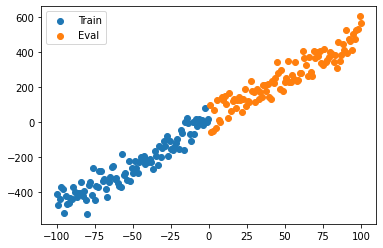

In [55]:
# Create data

xdata = num.linspace(-100, 100, 200)

num.random.seed(0)
noise = num.random.normal(0, 50, len(xdata))
#print(noise)
ydata = 5 * xdata + noise

index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xeval = xdata[index:]
yeval = ydata[index:]

xtrain = xtrain.reshape((-1, 1))
xeval = xeval.reshape((-1, 1))

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xeval, yeval, label='Eval')
plt.legend()
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [57]:
model.fit(xtrain, ytrain)

r_sq = model.score(xtrain, ytrain)
print('Train-R²:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Train-R²: 0.8870779618938582
intercept: -4.517853380231202
slope: [4.85058574]


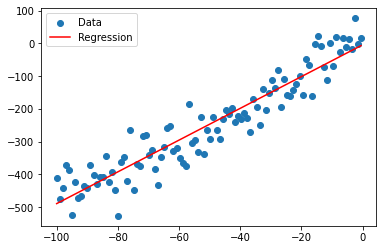

In [58]:
yregr = model.coef_ * xtrain + model.intercept_
#yregr = model.predict(xtrain)

plt.figure()
plt.scatter(xtrain, ytrain, label='Data')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.legend()
plt.show()

Eval-R²: 0.8645136656601717


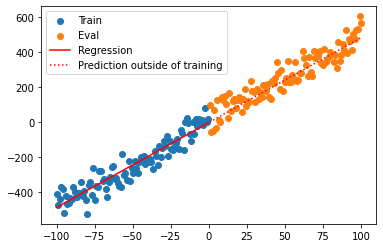

In [59]:
ypred = model.predict(xeval)
r_sq = model.score(xeval, yeval)
print('Eval-R²:', r_sq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xeval, yeval, label='Eval')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xeval, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.legend()
plt.show()

## PREDICTION OUTSIDE OF REGRESSION LEARNING DATA should be avoided

Train-R²: 0.8247743429776171
Eval-R²: -0.8910398147091712


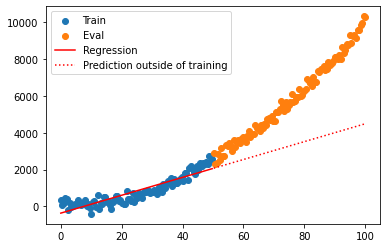

In [60]:
model = LinearRegression()

xdata = num.linspace(0, 100, 200)

num.random.seed(0)
noise = num.random.normal(0, 200, len(xdata))
ydata = xdata**2 + noise

index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xeval = xdata[index:]
yeval = ydata[index:]


xtrain = xtrain.reshape((-1, 1))
xeval = xeval.reshape((-1, 1))

model.fit(xtrain, ytrain)

yregr = model.predict(xtrain)
r_sq = model.score(xtrain, ytrain)
print('Train-R²:', r_sq)

ypred = model.predict(xeval)
r_sq = model.score(xeval, yeval)
print('Eval-R²:', r_sq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xeval, yeval, label='Eval')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xeval, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.legend()
plt.show()

Train-R²: 0.9432534544467439
Eval-R²: 0.6969737664325499


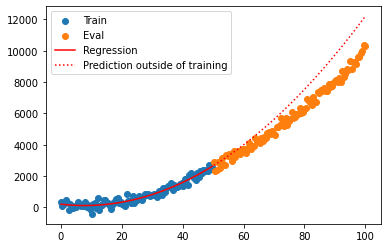

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

xdata = num.linspace(0, 100, 200)

num.random.seed(0)
noise = num.random.normal(0, 200, len(xdata))
ydata = xdata**2 + noise

index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xeval = xdata[index:]
yeval = ydata[index:]


xtrain = xtrain.reshape((-1, 1))
xeval = xeval.reshape((-1, 1))

model.fit(xtrain, ytrain)

yregr = model.predict(xtrain)
r_sq = model.score(xtrain, ytrain)
print('Train-R²:', r_sq)

ypred = model.predict(xeval)
r_sq = model.score(xeval, yeval)
print('Eval-R²:', r_sq)

plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xeval, yeval, label='Eval')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xeval, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.legend()
plt.show()

Play with different functions and degree of polynominals

## Tasks
- different number in datasets
- Different orders
- different functions
- overfitting
- underfitting
- prediction outside of learning space


# With numpy polynomial

Coeffs: [  49.08181712 -398.38887641]
[39860442.23403606]


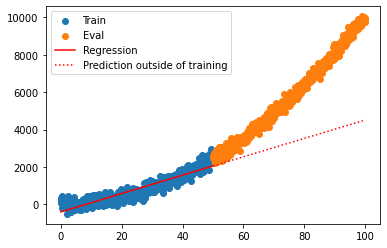

In [4]:
# Create data
xdata = num.linspace(0, 100, 1000)

num.random.seed(0)
noise = num.random.normal(0, 200, len(xdata))
ydata = xdata**2 + noise
#ydata = xdata * 1 + noise
#ydata = num.sin(xdata * 2 * num.pi * 0.01) + xdata * 0.01

index = int(len(xdata)/2)
xtrain = xdata[:index]
ytrain = ydata[:index]

xeval = xdata[index:]
yeval = ydata[index:]


order = 1

coeff, residuals, rank, singular_values, rcond = num.polyfit(xtrain, ytrain, order, full=True)
print('Coeffs:', coeff)
print(residuals)

model = num.poly1d(coeff)

yregr = model(xtrain)

ypred = model(xeval)


plt.figure()
plt.scatter(xtrain, ytrain, label='Train')
plt.scatter(xeval, yeval, label='Eval')
plt.plot(xtrain, yregr, color='red', label='Regression')
plt.plot(xeval, ypred, color='red', linestyle=':', label='Prediction outside of training')
plt.legend()
plt.show()